In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sevir

PATCH_SIZE = 256
with sevir.FeatureGenerator(
    "/mnt/data/sevir", inputs=(sevir.ImageType.IR_069,), targets=(sevir.ImageType.VIL,), patch_size=PATCH_SIZE
) as tg:
    ((ir,), (vil,)), df = tg.select("R19082620197425", metadata=True)

INFO:root:Loading 10 files with 1 image types.
100%|██████████| 10/10 [00:00<00:00, 20.60it/s]
INFO:root:Loading 10 files with 1 image types.
100%|██████████| 10/10 [00:00<00:00, 23.30it/s]
INFO:root:🏪 Closing Store 🏪


In [20]:
Feature = tuple[
    tuple[int, int, int],
    tuple[int, int, int],
    tuple[int, int, int],
]

arr = vil.numpy()

print(arr.shape)


def engineer_features(arr: np.ndarray) -> list[Feature]:
    x, y = arr.shape  # (PATCH_SIZE, PATCH_SIZE)
    return [tuple(map(tuple, arr[i : i + 3, j : j + 3])) for i in range(x) for j in range(y)]


data = engineer_features(arr[:, :, 0])
# np.array([[list(d) for d in x] for x in data[:5]])

(256, 256, 49)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [4]:
values = sorted(set(data))
encoder: dict[Feature, int] = {value: i for i, value in enumerate(values)}
decoder: dict[int, Feature] = {i: value for i, value in enumerate(values)}
print(len(encoder))

30758


(256, 256)

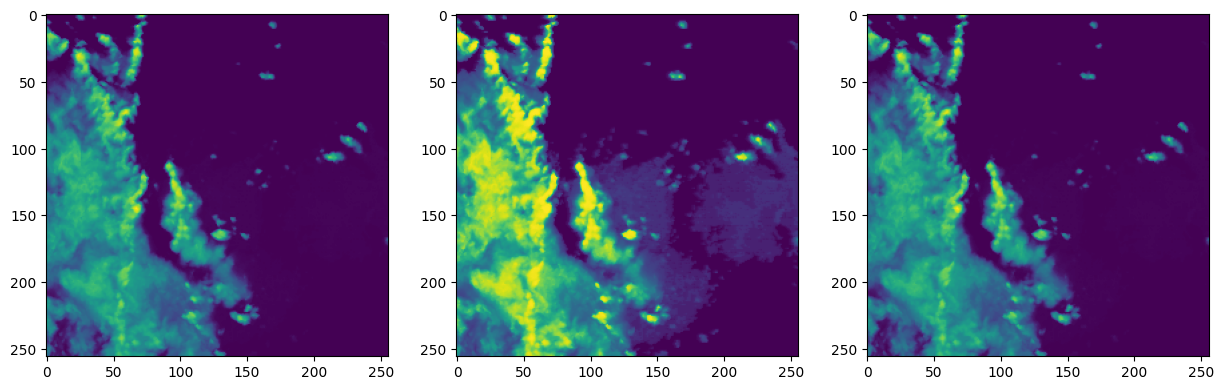

In [7]:
encoded_data = [encoder[value] for value in data]

feature_array = np.array(encoded_data).reshape(-1, PATCH_SIZE)
decoded_feature = np.array([decoder[value][0][0] for value in encoded_data]).reshape(-1, PATCH_SIZE)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(vil[:, :, 0])
ax[1].imshow(feature_array)
ax[2].imshow(decoded_feature)
feature_array.shape

In [ ]:
import src.sevir.core.datasets

N_INPUTS = 4
N_OUTPUTS = 2
with src.sevir.core.datasets.TimeSeriesGenerator(
    "/mnt/data/sevir",
    img_type=(sevir.ImageType.VIL,),
    n_inputs=N_INPUTS,
    n_outputs=N_OUTPUTS,
) as tsg:
    (x, y), df = tsg.select(("R18032505027684", 4), metadata=True)


x.shape, y.shape

In [ ]:
import src.sevir.core.datasets

N_INPUTS = 4
N_OUTPUTS = 2
tsg = src.sevir.core.datasets.TimeSeriesGenerator(
    "/mnt/data/sevir",
    img_types=(src.sevir.ImageType.VIL,),
    n_inputs=N_INPUTS,
    n_targets=N_OUTPUTS,
)
tsg.store.types

In [ ]:
tsg.store.interp("R18032505027684").shape

In [ ]:
tsg.store.data.filter(tsg.store.data["id"] == "R18032505027684")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

frames = N_INPUTS + N_OUTPUTS
x, y = tsg.select(("R18032505027684", N_INPUTS))
x.shape
fig, axs = plt.subplots(1, N_INPUTS + N_OUTPUTS, sharex=True, sharey=True, figsize=(20, 10))
for i in range(N_INPUTS):
    axs[i].imshow(x[0, :, :, i])
    axs[i].set_title(f"Input {i}")


for i in range(N_OUTPUTS):
    axs[i + N_INPUTS].imshow(y[0, :, :, i])
    axs[i + N_INPUTS].set_title(f"Output {i}")

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# plt.imshow(x[0, :, :, -1])
axs[0].imshow(x[0, :, :, -1])
axs[1].imshow(y[0, :, :, -1])

In [ ]:
import pandas as pd
import datetime
import polars as pl

pd.date_range(df["time_utc"][0], periods=49, freq="5min")
# df
arr = df["time_utc"].to_numpy()


pd.DatetimeIndex(np.c_[arr, arr + np.timedelta64(5 * 49, "m")])